In [230]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


In [231]:
import numpy as np
import pandas as pd
import datetime
from datetime import date
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')


In [232]:
data=pd.read_csv('/kaggle/input/customer-personality-analysis/marketing_campaign.csv',sep="\t")

In [233]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.000,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [235]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000,2240.000,2216.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000
mean,5592.160,1968.806,52247.251,0.444,0.506,49.109,303.936,26.302,166.950,37.525,27.063,44.022,2.325,4.085,2.662,5.790,5.317,0.073,0.075,0.073,0.064,0.013,0.009,3.000,11.000,0.149
std,3246.662,11.984,25173.077,0.538,0.545,28.962,336.597,39.773,225.715,54.629,41.280,52.167,1.932,2.779,2.923,3.251,2.427,0.260,0.263,0.260,0.245,0.115,0.096,0.000,0.000,0.356
min,0.000,1893.000,1730.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,11.000,0.000
25%,2828.250,1959.000,35303.000,0.000,0.000,24.000,23.750,1.000,16.000,3.000,1.000,9.000,1.000,2.000,0.000,3.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,11.000,0.000
50%,5458.500,1970.000,51381.500,0.000,0.000,49.000,173.500,8.000,67.000,12.000,8.000,24.000,2.000,4.000,2.000,5.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,11.000,0.000
75%,8427.750,1977.000,68522.000,1.000,1.000,74.000,504.250,33.000,232.000,50.000,33.000,56.000,3.000,6.000,4.000,8.000,7.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,11.000,0.000
max,11191.000,1996.000,666666.000,2.000,2.000,99.000,1493.000,199.000,1725.000,259.000,263.000,362.000,15.000,27.000,28.000,13.000,20.000,1.000,1.000,1.000,1.000,1.000,1.000,3.000,11.000,1.000


**we have missing values in the Income table and as this is a clustring not a predicting problem , we can't really guess what the income is , so we will drop the missing values**

In [236]:
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


**Now regarding the Dt_customer , we don't know what date should we use in order to extract number of days for each customer 
so i will just use the most recent record in our data**

In [237]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [238]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])


In [239]:
max_date = data['Dt_Customer'].max()
data['_num_days'] = (max_date - data['Dt_Customer']).dt.days

**Based on the recent dates , I'm going to assume that we live in 2015 .. 
also we notice a lot of values in the categorical features 
here comes the feature engineering part**

In [240]:
#Feature Engineering
#Age of customer today 
data["Age"] = 2015-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [241]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,_num_days,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000
mean,52247.251,0.442,0.505,49.013,305.092,26.356,166.996,37.638,27.029,43.965,2.324,4.085,2.671,5.801,5.319,0.074,0.074,0.073,0.064,0.014,0.009,0.150,512.006,46.180,607.075,0.947,2.593,0.714
std,25173.077,0.537,0.544,28.948,337.328,39.794,224.283,54.752,41.072,51.815,1.924,2.741,2.927,3.251,2.425,0.261,0.262,0.260,0.245,0.116,0.097,0.357,232.469,11.986,602.900,0.749,0.906,0.452
min,1730.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,19.000,5.000,0.000,1.000,0.000
25%,35303.000,0.000,0.000,24.000,24.000,2.000,16.000,3.000,1.000,9.000,1.000,2.000,0.000,3.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,340.000,38.000,69.000,0.000,2.000,0.000
50%,51381.500,0.000,0.000,49.000,174.500,8.000,68.000,12.000,8.000,24.500,2.000,4.000,2.000,5.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,513.000,45.000,396.500,1.000,3.000,1.000
75%,68522.000,1.000,1.000,74.000,505.000,33.000,232.250,50.000,33.000,56.000,3.000,6.000,4.000,8.000,7.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,686.000,56.000,1048.000,1.000,3.000,1.000
max,666666.000,2.000,2.000,99.000,1493.000,199.000,1725.000,259.000,262.000,321.000,15.000,27.000,28.000,13.000,20.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1063.000,122.000,2525.000,3.000,5.000,1.000


In [242]:
data.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', '_num_days',
       'Age', 'Spent', 'Living_With', 'Children', 'Family_Size', 'Is_Parent'],
      dtype='object')

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

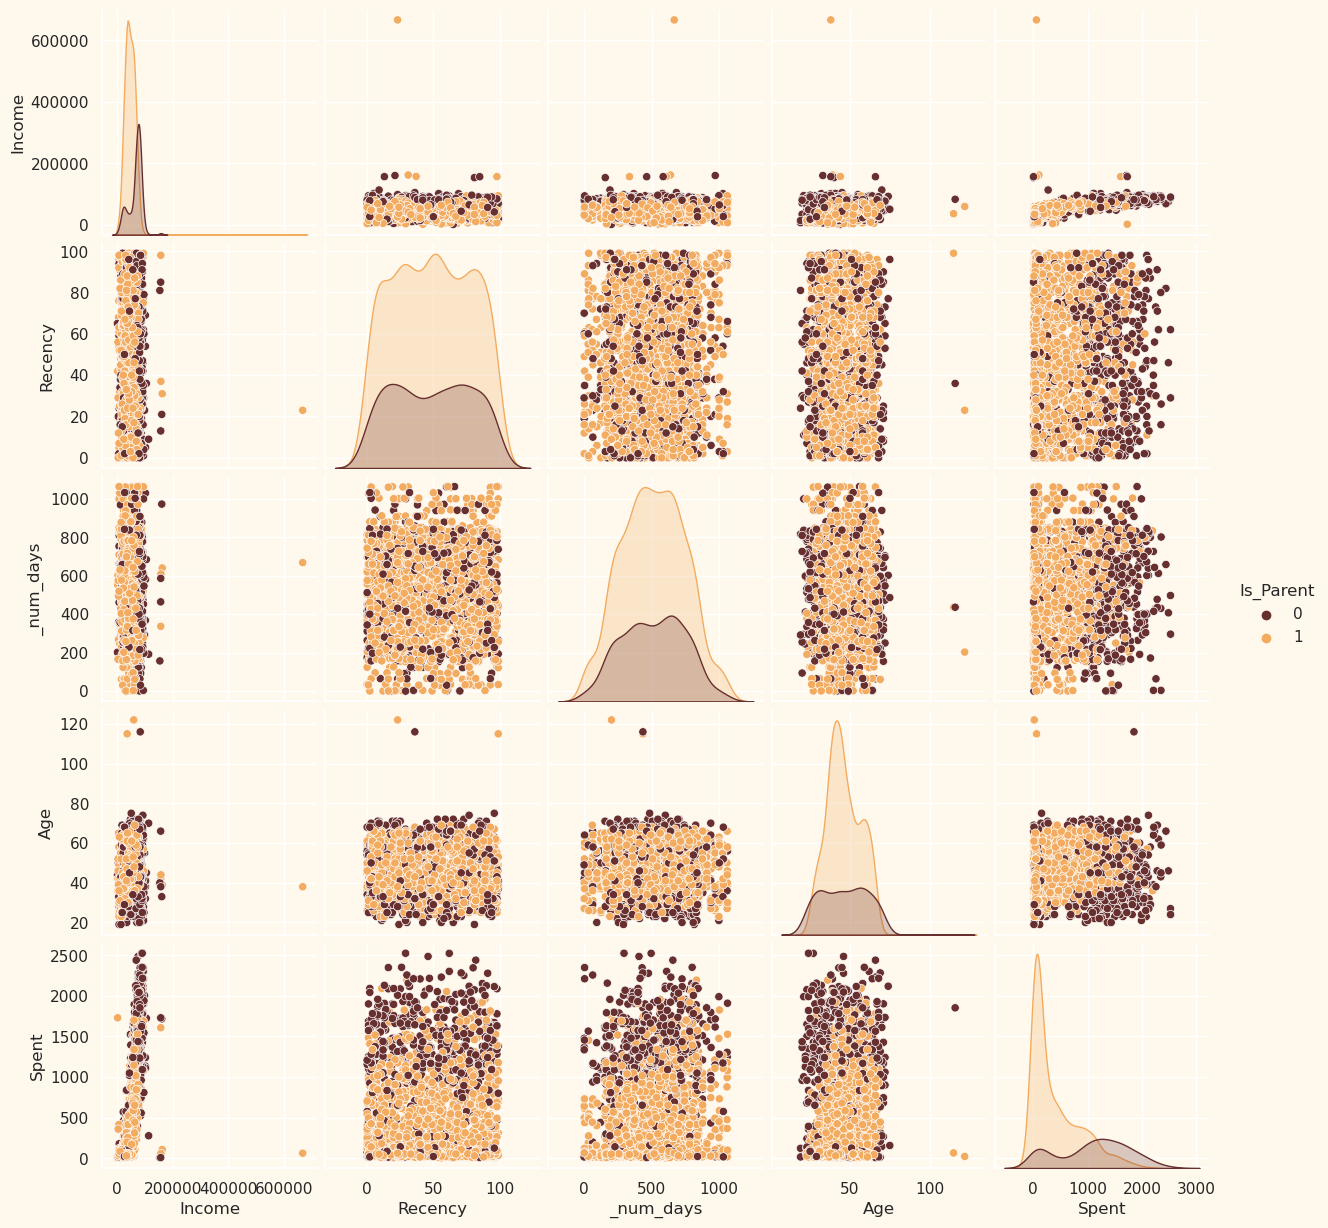

In [243]:
from matplotlib import colors
from matplotlib.colors import ListedColormap
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "_num_days", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

**conclusion : We have a lot of work to do with outliers**

In [244]:
q1_income = np.percentile(data['Income'], 25)
q3_income = np.percentile(data['Income'], 75)

q1_age = np.percentile(data['Age'], 25)
q3_age = np.percentile(data['Age'], 75)

iqr_income = q3_income - q1_income
iqr_age = q3_age - q1_age

threshold = 1.5

outliers_income = data[(data['Income'] < q1_income - threshold * iqr_income) | (data['Income'] > q3_income + threshold * iqr_income)]
outliers_age = data[(data['Age'] < q1_age - threshold * iqr_age) | (data['Age'] > q3_age + threshold * iqr_age)]

print("Outliers in 'Income':")
print(outliers_income)

print("\nOutliers in 'Age':")
print(outliers_age)


Outliers in 'Income':
         Education     Income  Kidhome  Teenhome  Recency  Wines  Fruits  \
164   Postgraduate 157243.000        0         1       98     20       2   
617   Postgraduate 162397.000        1         1       31     85       1   
655       Graduate 153924.000        0         0       81      1       1   
687   Postgraduate 160803.000        0         0       21     55      16   
1300  Postgraduate 157733.000        1         0       37     39       1   
1653      Graduate 157146.000        0         0       13      1       0   
2132  Postgraduate 156924.000        0         0       85      2       1   
2233      Graduate 666666.000        1         0       23      9      14   

      Meat  Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
164   1582     1       2     1                 15                0   
617     16     2       1     2                  0                0   
655      1     1       1     1                  0                0   
687   1622   

In [245]:
# Drop the maximum value in 'Income'
max_income = data['Income'].max()
data = data[data['Income'] != max_income]

# Remove outliers in 'Age'
q1_age = np.percentile(data['Age'], 25)
q3_age = np.percentile(data['Age'], 75)
iqr_age = q3_age - q1_age
threshold = 1.5

lower_bound = q1_age - threshold * iqr_age
upper_bound = q3_age + threshold * iqr_age

data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]


1. Stars: Old customers with high income and high spending nature.
2. Neet Attention: New customers with below-average income and low spending nature. 
3. High Potential: New customers with high income and high spending nature.
4. Leaky Bucket: Old customers with below-average income and a low spending nature.


In [246]:
scaler=StandardScaler()
dataset_temp=data[['Income','_num_days','Spent']]
X_std=scaler.fit_transform(dataset_temp)
X = normalize(X_std,norm='l2')

gmm=GaussianMixture(n_components=4, covariance_type='spherical',max_iter=2000, random_state=5).fit(X)
labels = gmm.predict(X)
dataset_temp['Cluster'] = labels
dataset_temp=dataset_temp.replace({0:'Stars',1:'Need attention',2:'High potential',3:'Leaky bucket'})
data = data.merge(dataset_temp.Cluster, left_index=True, right_index=True)

pd.options.display.float_format = "{:.0f}".format
summary=data[['Income','Spent','_num_days','Cluster']]
summary.set_index("Cluster", inplace = True)
summary=summary.groupby('Cluster').describe().transpose()
summary.head()

Cluster       High potential  Leaky bucket  Need attention  Stars
Income count             510           389             308   1005
       mean            40543         36813           27860  71000
       std             11959         11199            9352  13293
       min              1730          6835            3502   2447
       25%             32628         29999           21900  62568

In [247]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the features for clustering
features = ['Income', '_num_days', 'Spent']

# Create a new dataframe with the selected features
data_cluster = data[features].copy()

# Scale the data using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cluster)

# Apply k-means clustering
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=5)
labels = kmeans.fit_predict(data_scaled)

# Map cluster labels to names
cluster_names = {0: 'Stars', 1: 'Need attention', 2: 'High potential', 3: 'Leaky bucket'}
cluster_labels = [cluster_names[label] for label in labels]

# Assign cluster labels to the original dataset
data['Cluster'] = cluster_labels

# Create a summary dataframe
summary = data.groupby('Cluster')[features].describe().transpose()

summary


Cluster          High potential  Leaky bucket  Need attention  Stars
Income    count             659           449             468    636
          mean            36270         74014           70764  38807
          std             12998         13037           12578  12999
          min              2447         50898           44802   1730
          25%             27100         65685           62736  29590
          50%             36790         72460           69884  38632
          75%             46051         79941           78712  48918
          max             66503        162397          160803  69139
_num_days count             659           449             468    636
          mean              686           330             722    305
          std               131           135             128    124
          min               490             1             477      0
          25%               581           226             619    220
          50%               665           352             702    318
          75%               779           435             804    409
          max              1063           640            1063    501
Spent     count             659           449             468    636
          mean              213          1130            1302    136
          std               206           448             413    145
          min                 5             6             431      6
          25%                51           809             981     41
          50%               122          1064            1250     68
          75%               354          1427            1590    189
          max              1730          2525            2524    660

**Well , K means makes more sense to me !**

In [248]:
PLOT = go.Figure()
for C in list(data.Cluster.unique()):
    

    PLOT.add_trace(go.Scatter3d(x = data[data.Cluster == C]['Income'],
                                y = data[data.Cluster == C]['_num_days'],
                                z = data[data.Cluster == C]['Spent'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(C)))
PLOT.update_traces(hovertemplate='Income: %{x} <br>Seniority: %{y} <br>Spending: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Income', titlefont_color = 'black'),
                                yaxis=dict(title = '_num_days', titlefont_color = 'black'),
                                zaxis=dict(title = 'Spent', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

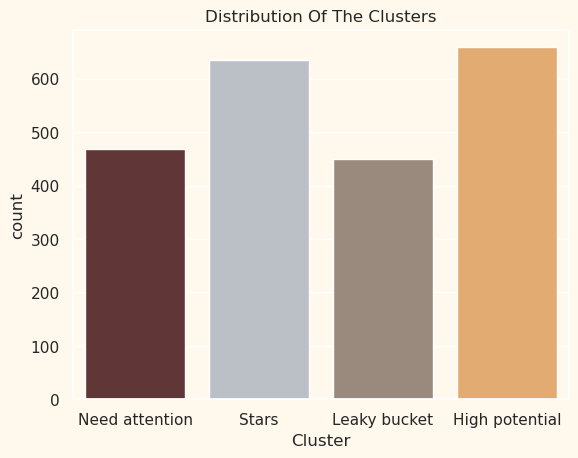

In [249]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Cluster"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [250]:
cut_labels_Age = ['Young', 'Adult', 'Mature', 'Senior']
cut_bins = [0, 30, 45, 65, 120]
data['Age_group'] = pd.cut(data['Age'], bins=cut_bins, labels=cut_labels_Age)
#Create Income segment
cut_labels_Income = ['Low income', 'Low to medium income', 'Medium to high income', 'High income']
data['Income_group'] = pd.qcut(data['Income'], q=4, labels=cut_labels_Income)
#Create Seniority segment
cut_labels_Seniority = ['New customers', 'Discovering customers', 'Experienced customers', 'Old customers']
data['Seniority_group'] = pd.qcut(data['_num_days'], q=4, labels=cut_labels_Seniority)
data=data.drop(columns=['Age','Income','_num_days'])

In [251]:
cut_labels = ['Low consumer', 'Frequent consumer', 'Biggest consumer']
data['Wines_segment'] = pd.qcut(data['Wines'][data['Wines']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data['Fruits_segment'] = pd.qcut(data['Fruits'][data['Fruits']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data['Meat_segment'] = pd.qcut(data['Meat'][data['Meat']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data['Fish_segment'] = pd.qcut(data['Fish'][data['Fish']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data['Sweets_segment'] = pd.qcut(data['Sweets'][data['Sweets']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data['Gold_segment'] = pd.qcut(data['Gold'][data['Gold']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data.replace(np.nan, "Non consumer",inplace=True)
data.drop(columns=['Spent','Wines','Fruits','Meat','Fish','Sweets','Gold'],inplace=True)
data = data.astype(object)

In [252]:
data.head()

,Education,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Living_With,Children,Family_Size,Is_Parent,Cluster,Age_group,Income_group,Seniority_group,Wines_segment,Fruits_segment,Meat_segment,Fish_segment,Sweets_segment,Gold_segment
0,Graduate,0,0,58,3,8,10,4,7,0,0,0,0,0,0,1,Alone,0,1,0,Need attention,Mature,Medium to high income,Old customers,Biggest consumer,Biggest consumer,Biggest consumer,Biggest consumer,Biggest consumer,Biggest consumer
1,Graduate,1,1,38,2,1,1,2,5,0,0,0,0,0,0,0,Alone,2,3,1,Stars,Mature,Low to medium income,New customers,Low consumer,Low consumer,Low consumer,Low consumer,Low consumer,Low consumer
2,Graduate,0,0,26,1,8,2,10,4,0,0,0,0,0,0,0,Partner,0,2,0,Leaky bucket,Mature,High income,Discovering customers,Frequent consumer,Biggest consumer,Frequent consumer,Biggest consumer,Frequent consumer,Frequent consumer
3,Graduate,1,0,26,2,2,0,4,6,0,0,0,0,0,0,0,Partner,1,3,1,Stars,Adult,Low income,New customers,Low consumer,Low consumer,Frequent consumer,Frequent consumer,Low consumer,Low consumer
4,Postgraduate,1,0,94,5,5,3,6,5,0,0,0,0,0,0,0,Partner,1,3,1,Stars,Adult,Medium to high income,New customers,Frequent consumer,Frequent consumer,Frequent consumer,Frequent consumer,Frequent consumer,Frequent consumer


In [253]:
data=data[['Education','Recency','Complain','Living_With','Family_Size','Is_Parent','Cluster','Age_group','Income_group','Seniority_group','Wines_segment','Fruits_segment','Meat_segment','Fish_segment','Sweets_segment','Gold_segment']]

In [254]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 999)
pd.options.display.float_format = "{:.3f}".format
association=data.copy() 
df = pd.get_dummies(association)
min_support = 0.05
max_len = 10
frequent_items = apriori(df, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)



In [255]:
product='Wines'
segment='Biggest consumer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnal_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnal_care.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
19164,"(Income_group_High income, Is_Parent_0, Education_Postgraduate)",(Wines_segment_Biggest consumer),0.067,0.249,0.052,0.772,3.104,0.035,3.293,0.727
57169,"(Education_Postgraduate, Income_group_High income, Complain_0, Is_Parent_0)",(Wines_segment_Biggest consumer),0.067,0.249,0.052,0.772,3.104,0.035,3.293,0.727
19737,"(Income_group_High income, Meat_segment_Biggest consumer, Education_Postgraduate)",(Wines_segment_Biggest consumer),0.069,0.249,0.053,0.765,3.076,0.036,3.193,0.725
58401,"(Income_group_High income, Meat_segment_Biggest consumer, Complain_0, Education_Postgraduate)",(Wines_segment_Biggest consumer),0.069,0.249,0.053,0.765,3.076,0.036,3.193,0.725
19190,"(Meat_segment_Biggest consumer, Is_Parent_0, Education_Postgraduate)",(Wines_segment_Biggest consumer),0.069,0.249,0.052,0.750,3.016,0.034,3.005,0.718


**Conclusion**


**Biggest_consumers for wine are customer with High income,no children , postgraduate**

In [256]:
product='Fruits'
segment='Biggest consumer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnal_care1 = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnal_care1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
45755,"(Meat_segment_Biggest consumer, Fish_segment_Biggest consumer, Sweets_segment_Biggest consumer)",(Fruits_segment_Biggest consumer),0.093,0.203,0.065,0.702,3.461,0.046,2.678,0.784
83655,"(Meat_segment_Biggest consumer, Complain_0, Fish_segment_Biggest consumer, Sweets_segment_Biggest consumer)",(Fruits_segment_Biggest consumer),0.093,0.203,0.065,0.702,3.461,0.046,2.678,0.784
45768,"(Gold_segment_Biggest consumer, Meat_segment_Biggest consumer, Fish_segment_Biggest consumer)",(Fruits_segment_Biggest consumer),0.078,0.203,0.053,0.682,3.360,0.037,2.507,0.762
83684,"(Gold_segment_Biggest consumer, Meat_segment_Biggest consumer, Complain_0, Fish_segment_Biggest consumer)",(Fruits_segment_Biggest consumer),0.078,0.203,0.053,0.682,3.360,0.037,2.507,0.762
16751,"(Education_Graduate, Fish_segment_Biggest consumer, Sweets_segment_Biggest consumer)",(Fruits_segment_Biggest consumer),0.075,0.203,0.051,0.679,3.344,0.035,2.481,0.757


**Biggest_consumers for Fruits are  those who considered as big consumer for other categories + Education_graduate**

In [257]:
product='Meat'
segment='Biggest consumer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnal_care2 = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnal_care2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
90486,"(Wines_segment_Biggest consumer, Income_group_High income, Is_Parent_0, Fish_segment_Biggest consumer)",(Meat_segment_Biggest consumer),0.059,0.250,0.054,0.915,3.662,0.039,8.864,0.772
114037,"(Complain_0, Is_Parent_0, Income_group_High income, Fish_segment_Biggest consumer, Wines_segment_Biggest consumer)",(Meat_segment_Biggest consumer),0.059,0.250,0.054,0.915,3.662,0.039,8.864,0.772
74492,"(Wines_segment_Biggest consumer, Complain_0, Is_Parent_0, Fish_segment_Biggest consumer)",(Meat_segment_Biggest consumer),0.067,0.250,0.061,0.912,3.649,0.044,8.538,0.778
41308,"(Wines_segment_Biggest consumer, Is_Parent_0, Fish_segment_Biggest consumer)",(Meat_segment_Biggest consumer),0.067,0.250,0.061,0.906,3.624,0.044,7.982,0.776
74230,"(Income_group_High income, Complain_0, Is_Parent_0, Fish_segment_Biggest consumer)",(Meat_segment_Biggest consumer),0.102,0.250,0.092,0.903,3.611,0.067,7.705,0.805
